In [46]:
import pandas as pd
import numpy as np
import ast
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from joblib import dump


In [2]:
df1 = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/k-nearest-neighbors-project-tutorial/main/tmdb_5000_movies.csv")

In [3]:
df2 = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/k-nearest-neighbors-project-tutorial/main/tmdb_5000_credits.csv")

In [4]:
df1.head(5)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [5]:
df2.head(5)

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


### Setting revenue threshold to try and distinguish successfull movies from less successful ones 

- Creating a new binary column where movies with revenue in the top 25% are labeled 1 (success), and moveies below the threshold are labeled as 0 (not a success)

In [6]:
threshold = df1['revenue'].quantile(0.75)  # Example: Top 25% as successful
df1['success'] = (df1['revenue'] > threshold).astype(int)

In [7]:
# 'Release_date' might impact a movie's success. 
# extracting month

df1['release_month'] = pd.to_datetime(df1['release_date']).dt.month


### Parsing columns

In [8]:
df1['spoken_languages'] = df1['spoken_languages'].apply(ast.literal_eval)
df1['spoken_languages'] = df1['spoken_languages'].apply(lambda x: [language['name'] for language in x] if x else [])


In [9]:
df1['production_countries'] = df1['production_countries'].apply(ast.literal_eval)
df1['production_countries'] = df1['production_countries'].apply(lambda x: [country['name'] for country in x] if x else [])


In [10]:
df1['keywords'] = df1['keywords'].apply(ast.literal_eval)
df1['keywords'] = df1['keywords'].apply(lambda x: [keyword['name'] for keyword in x] if x else [])


In [11]:
df1['genres'] = df1['genres'].apply(ast.literal_eval)
df1['genres'] = df1['genres'].apply(lambda x: [genre['name'] for genre in x] if x else [])

In [12]:
df1['production_companies'] = df1['production_companies'].apply(ast.literal_eval)
df1['production_companies'] = df1['production_companies'].apply(lambda x: x[0]['name'] if x else None)

### Missing data

In [13]:
df1.columns

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count', 'success', 'release_month'],
      dtype='object')

In [14]:
missing_values = df1.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 budget                     0
genres                     0
homepage                3091
id                         0
keywords                   0
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies     351
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title                      0
vote_average               0
vote_count                 0
success                    0
release_month              1
dtype: int64


In [15]:
df1.dropna(subset=['production_companies', 'runtime', 'release_month'], inplace=True)

In [16]:
columns_to_drop = ["homepage", "id", "overview", "tagline", "title", "release_date"]

# Drop the specified columns
df1 = df1.drop(columns=columns_to_drop, axis=1)


In [17]:
df1.dtypes

budget                    int64
genres                   object
keywords                 object
original_language        object
original_title           object
popularity              float64
production_companies     object
production_countries     object
revenue                   int64
runtime                 float64
spoken_languages         object
status                   object
vote_average            float64
vote_count                int64
success                   int32
release_month           float64
dtype: object

In [18]:
df1.shape

(4450, 16)

Columns with lists:
- genres, keywords, production_countries

Binary
Ordinal
Nominal
- genres
- keywords
- original_language
- original_title
- production_companies
- production_countries
- 

In [19]:
df1.head(4)

,budget,genres,keywords,original_language,original_title,popularity,production_companies,production_countries,revenue,runtime,spoken_languages,status,vote_average,vote_count,success,release_month
0,237000000,"[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...",en,Avatar,150.437577,Ingenious Film Partners,"[United States of America, United Kingdom]",2787965087,162.0,"[English, Español]",Released,7.2,11800,1,12.0
1,300000000,"[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ...",en,Pirates of the Caribbean: At World's End,139.082615,Walt Disney Pictures,[United States of America],961000000,169.0,[English],Released,6.9,4500,1,5.0
2,245000000,"[Action, Adventure, Crime]","[spy, based on novel, secret agent, sequel, mi...",en,Spectre,107.376788,Columbia Pictures,"[United Kingdom, United States of America]",880674609,148.0,"[Français, English, Español, Italiano, Deutsch]",Released,6.3,4466,1,10.0
3,250000000,"[Action, Crime, Drama, Thriller]","[dc comics, crime fighter, terrorist, secret i...",en,The Dark Knight Rises,112.312950,Legendary Pictures,[United States of America],1084939099,165.0,[English],Released,7.6,9106,1,7.0


In [20]:
total_missing_values = df1.isnull().sum().sum()
print("Total missing values:", total_missing_values)


Total missing values: 0


In [21]:
# import pandas as pd

# # Assuming 'df1' is your DataFrame
# # Extract the 'genres' column and create dummy variables
# genres_dummies = pd.get_dummies(df1['genres'].apply(pd.Series).stack()).groupby(level=0).sum()

# # Concatenate the dummy variables with the original DataFrame
# df1 = pd.concat([df1, genres_dummies], axis=1)

# # Display the updated DataFrame
# print(df1)


In [22]:
# Assuming df1 is your original DataFrame

# Step 1: Explode the specified columns
columns_to_explode = ['genres', 'keywords', 'production_countries', 'spoken_languages']
df_exploded = pd.concat([df1.drop(columns=columns_to_explode), df1[columns_to_explode].explode('genres').reset_index(drop=True)], axis=1)

# Step 2: Transform lists into strings
for col in columns_to_explode:
    df_exploded[col] = df_exploded[col].astype(str)

# Step 3: One-hot encode categorical features
columns_to_one_hot_encode = ['genres', 'keywords', 'production_countries', 'spoken_languages']
encoder = OneHotEncoder(max_categories=5, sparse_output=False, drop='first')
X_dummies = encoder.fit_transform(df_exploded[columns_to_one_hot_encode])

# Step 4: Concatenate one-hot encoded features with numerical features
X_num = df1.select_dtypes(include=['number'])
X_combined = pd.concat([pd.DataFrame(X_num), pd.DataFrame(X_dummies)], axis=1)

# Now, X_combined should have the same number of rows for both numerical and categorical features


In [29]:
missing_values = X_combined.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 budget           0
popularity       0
revenue          0
runtime          0
vote_average     0
vote_count       0
success          0
release_month    0
0                0
1                0
2                0
3                0
4                0
5                0
6                0
7                0
8                0
9                0
10               0
11               0
12               0
13               0
14               0
15               0
dtype: int64


In [24]:
X_combined.shape

(11515, 24)

In [25]:
# Drop rows with missing values in specified columns
columns_with_missing = ['budget', 'popularity', 'revenue', 'runtime', 'vote_average', 'vote_count', 'success', 'release_month']
X_combined = X_combined.dropna(subset=columns_with_missing)

In [26]:
X = X_combined.drop(['revenue', 'success'], axis=1)
y = X_combined["success"].values

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    stratify=y,
                                                    random_state=1)

In [32]:
X_train.columns = X_train.columns.astype(str)
X_test.columns = X_test.columns.astype(str)

In [33]:
knn_classifier_1 = KNeighborsClassifier(n_neighbors=5, weights='uniform')
knn_classifier_1.fit(X_train, y_train)

KNeighborsClassifier()

In [36]:
print(knn_classifier_1.score(X_train, y_train))
print(knn_classifier_1.score(X_test, y_test))

0.8980337078651686
0.8505617977528089


In [37]:
train_accuracies = {}
test_accuracies = {}
neighbors = np.arange(1, 26)

for neighbor in neighbors:    
    knn = KNeighborsClassifier(n_neighbors=neighbor)    
    knn.fit(X_train, y_train)    
    train_accuracies[neighbor] = knn.score(X_train, y_train)    
    test_accuracies[neighbor] = knn.score(X_test, y_test)


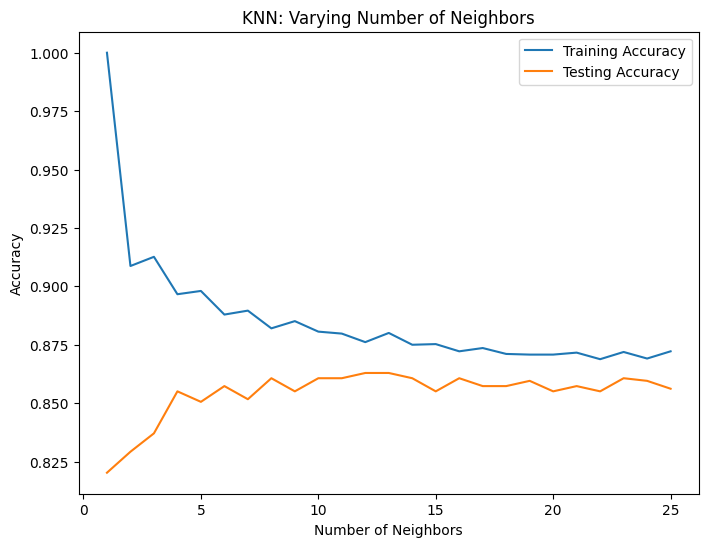

In [38]:
plt.figure(figsize=(8, 6))
plt.title("KNN: Varying Number of Neighbors")
plt.plot(neighbors, train_accuracies.values(), label="Training Accuracy")
plt.plot(neighbors, test_accuracies.values(), label="Testing Accuracy")
plt.legend()
plt.xlabel("Number of Neighbors")
plt.ylabel("Accuracy")
plt.show()


In [44]:
knn_classifier_2 = KNeighborsClassifier(n_neighbors=23, weights='uniform')
knn_classifier_2.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=23)

In [45]:
print(knn_classifier_2.score(X_train, y_train))
print(knn_classifier_2.score(X_test, y_test))

0.8719101123595505
0.8606741573033708


In [47]:
dump(knn_classifier_2, open("knn_classifier_2.sav", "wb"))